In [1]:
import pandas as pd
import base
import os

SEED = 42
base.fix_seed(SEED)

desired_directory = '/home/jovyan/work/spectrum/'
os.chdir(desired_directory)

2024-01-05 06:03:27.985362: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-05 06:03:28.023225: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-05 06:03:28.023262: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-05 06:03:28.024253: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-05 06:03:28.030457: I tensorflow/core/platform/cpu_feature_guar

In [2]:
df_etherpc  = base.read_MSP('Data/result_pos_etherpc.msp')
df_etherpc['Class'] = 'EtherPC'

df_etheroxpc  = base.read_MSP('Data/result_pos_etheroxpc.msp')
df_etheroxpc['Class'] = 'EtherOxPC'

In [3]:
df = pd.concat([df_etherpc, df_etheroxpc], axis=0)

In [8]:
df['MZ'] = df['MZ'].astype(float)
df['modnum'] = base.cal_mod(df['MZ'])

In [9]:
def extract_o_number(formula):
    o_index = formula.find('O')
    if o_index != -1:
        o_before = formula[:o_index]
        o_after = formula[o_index + 1:]
        return o_after.split('P')[0]
    return None

df['O'] = df['Formula'].apply(extract_o_number).astype(float)

In [10]:
df['addO'] = df.apply(lambda row: row['O'] - 7 if 'EtherPC' in row['Class'] else row['O'] - 8, axis=1)

In [11]:
df = df.query('addO == 0')

In [12]:
import matplotlib.pyplot as plt

/tmp/ipykernel_59323/1012590849.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OntologyCode'] = pd.Categorical(df['Class']).codes


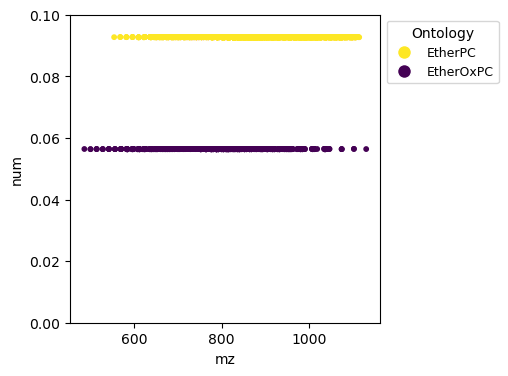

In [13]:
fig, ax = plt.subplots(1,1,figsize=(4,4))


df['OntologyCode'] = pd.Categorical(df['Class']).codes
scatter = plt.scatter(df['MZ'], df['modnum'], c=df['OntologyCode'], cmap='viridis', s=10)

plt.xlabel('mz')
plt.ylabel('num')

plt.ylim(0, 0.1)

legend_labels = df['Class'].unique()
legend_labels_numeric = df['Class'].astype('category').cat.codes.unique()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=10) for label in legend_labels_numeric]
plt.legend(legend_handles, legend_labels, title='Ontology', loc='upper left', bbox_to_anchor=(1, 1), fontsize=9)

plt.savefig('Data/svg/model/result/neg/rvalue_o-value_etherpc_dist.svg', format='svg', bbox_inches='tight')
#plt.grid()